# Spherical Projection

# Li Kailang FDQAOR

Due No Due Date Points 0 Submitting a file upload File Types py and ipynb

Download Scene 5 (Links to an external site.)

Calculate the normalized YAW and PITCH presented in the last slide of the 3D transformations

Use the data sheet of the Velodyne HDL-64E also available in the last slide of the 3D transformations to extract
FOV_UP
FOV_DOWN
Number of lasers

Project the normalized YAW and PITCH on an image of Height: Number of Lasers, Width: 1024

Show the projected data on a black image using HSV color mapping
cmap = plt.cm.get_cmap('hsv ', 256)
cmap = np.array([cmap(i) for i in range(256)])[:, :-1] * 255

 0. 确保已安装open3d、numpy、matplotlib和opencv-python库

In [ ]:
!pip install open3d numpy matplotlib opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.

1. 解压缩 Scene 5 文件

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. 加载点云数据

In [14]:
import numpy as np
import os

# 指定bin文件路径
bin_file_path = '/content/drive/MyDrive/3d point could/2011_09_26_drive_0005_sync/2011_09_26/2011_09_26_drive_0005_sync/velodyne_points/data/0000000000.bin'

# 加载点云数据
def load_point_cloud_from_bin(bin_path):
    point_cloud = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)  # x, y, z, intensity
    return point_cloud[:, :3], point_cloud[:, 3]  # 返回xyz坐标和强度

points, intensity = load_point_cloud_from_bin(bin_file_path)
x, y, z = points[:, 0], points[:, 1], points[:, 2]

print("点云数据加载完成")


点云数据加载完成


3. 进行球面投影并可视化

<ipython-input-18-3dca276b29de>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 256)


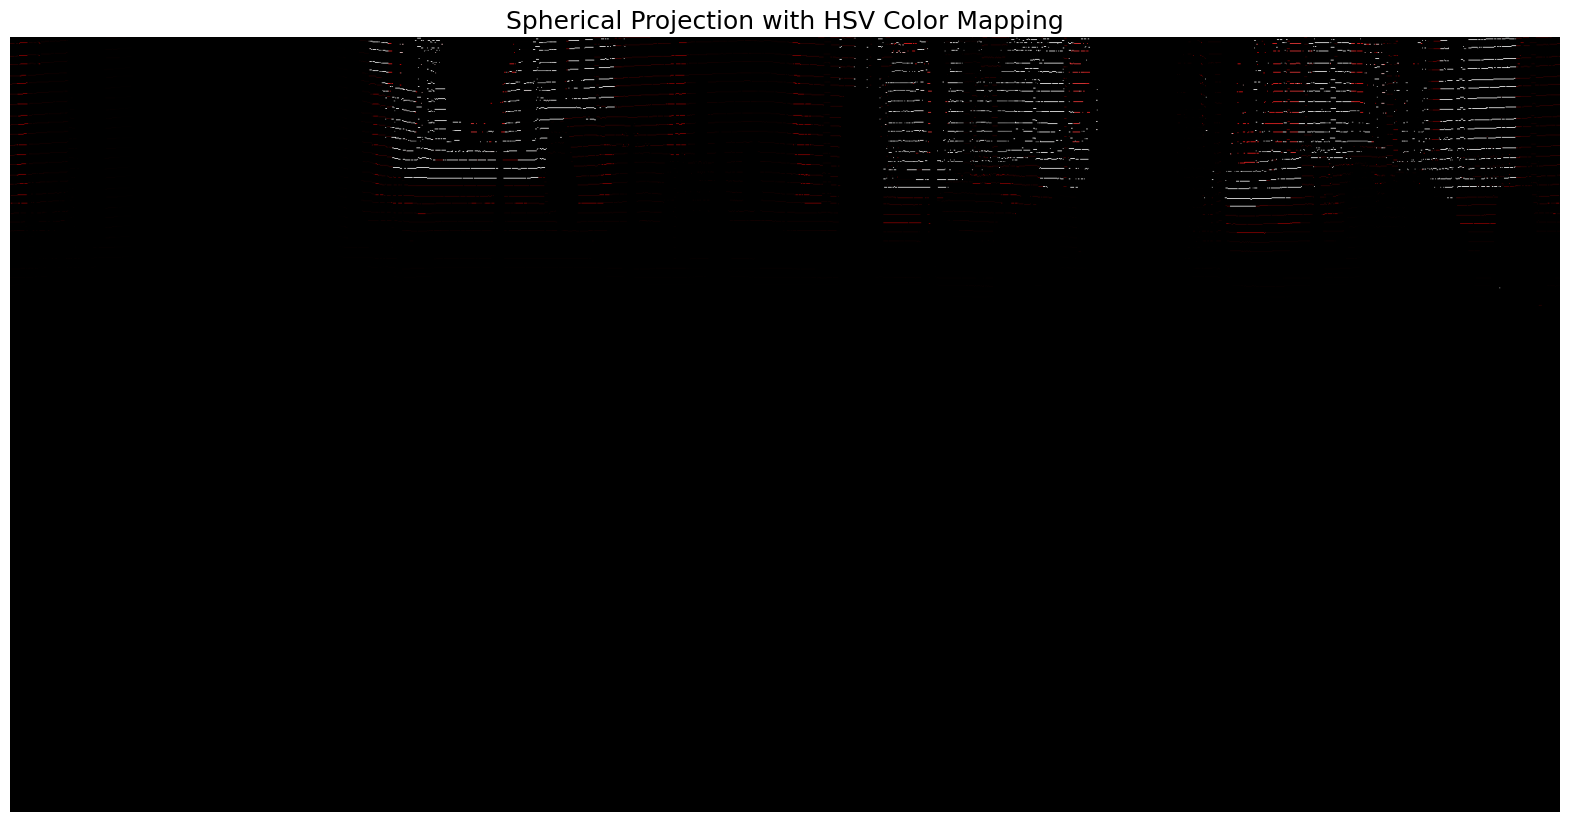

In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 设置传感器参数
FOV_UP = 2.0  # 上视场角度
FOV_DOWN = -24.8  # 下视场角度
NUM_LASERS = 1024  # 图像高度
IMAGE_WIDTH = 2048  # 图像宽度

# 假设已经加载点云数据
# x, y, z: 点云的xyz坐标
# intensity: 点的强度（之前已从bin文件加载）
r = np.sqrt(x**2 + y**2 + z**2)
yaw = np.arctan2(y, x)
pitch = np.arcsin(z / r)

# 归一化yaw和pitch
yaw_norm = (yaw + np.pi) / (2 * np.pi)
pitch_norm = (FOV_UP - pitch * 180 / np.pi) / (FOV_UP - FOV_DOWN)

# 将yaw_norm和pitch_norm转换为图像坐标
u = (IMAGE_WIDTH * yaw_norm).astype(np.int32)
v = (NUM_LASERS * pitch_norm).astype(np.int32)

# 创建黑色图像
image = np.zeros((NUM_LASERS, IMAGE_WIDTH, 3), dtype=np.uint8)

# 使用HSV颜色映射
cmap = plt.cm.get_cmap('hsv', 256)
cmap = np.array([cmap(i) for i in range(256)])[:, :-1] * 255

# 计算颜色映射索引
intensity_normalized = (intensity / np.max(intensity) * 255).astype(np.int32)  # 使用强度进行颜色映射
colors = cmap[intensity_normalized]

# 将点绘制到图像上
for i in range(len(x)):
    if 0 <= u[i] < IMAGE_WIDTH and 0 <= v[i] < NUM_LASERS:
        image[v[i], u[i]] = colors[intensity_normalized[i]]

# 转换为RGB格式以便于显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

# 调整显示尺寸
plt.figure(figsize=(20, 20))  # 增加显示窗口大小
plt.imshow(image_rgb)
plt.title('Spherical Projection with HSV Color Mapping', fontsize=18)  # 增大字体
plt.axis('off')
plt.show()
